# Real Estates - Price predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv('data.csv')

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

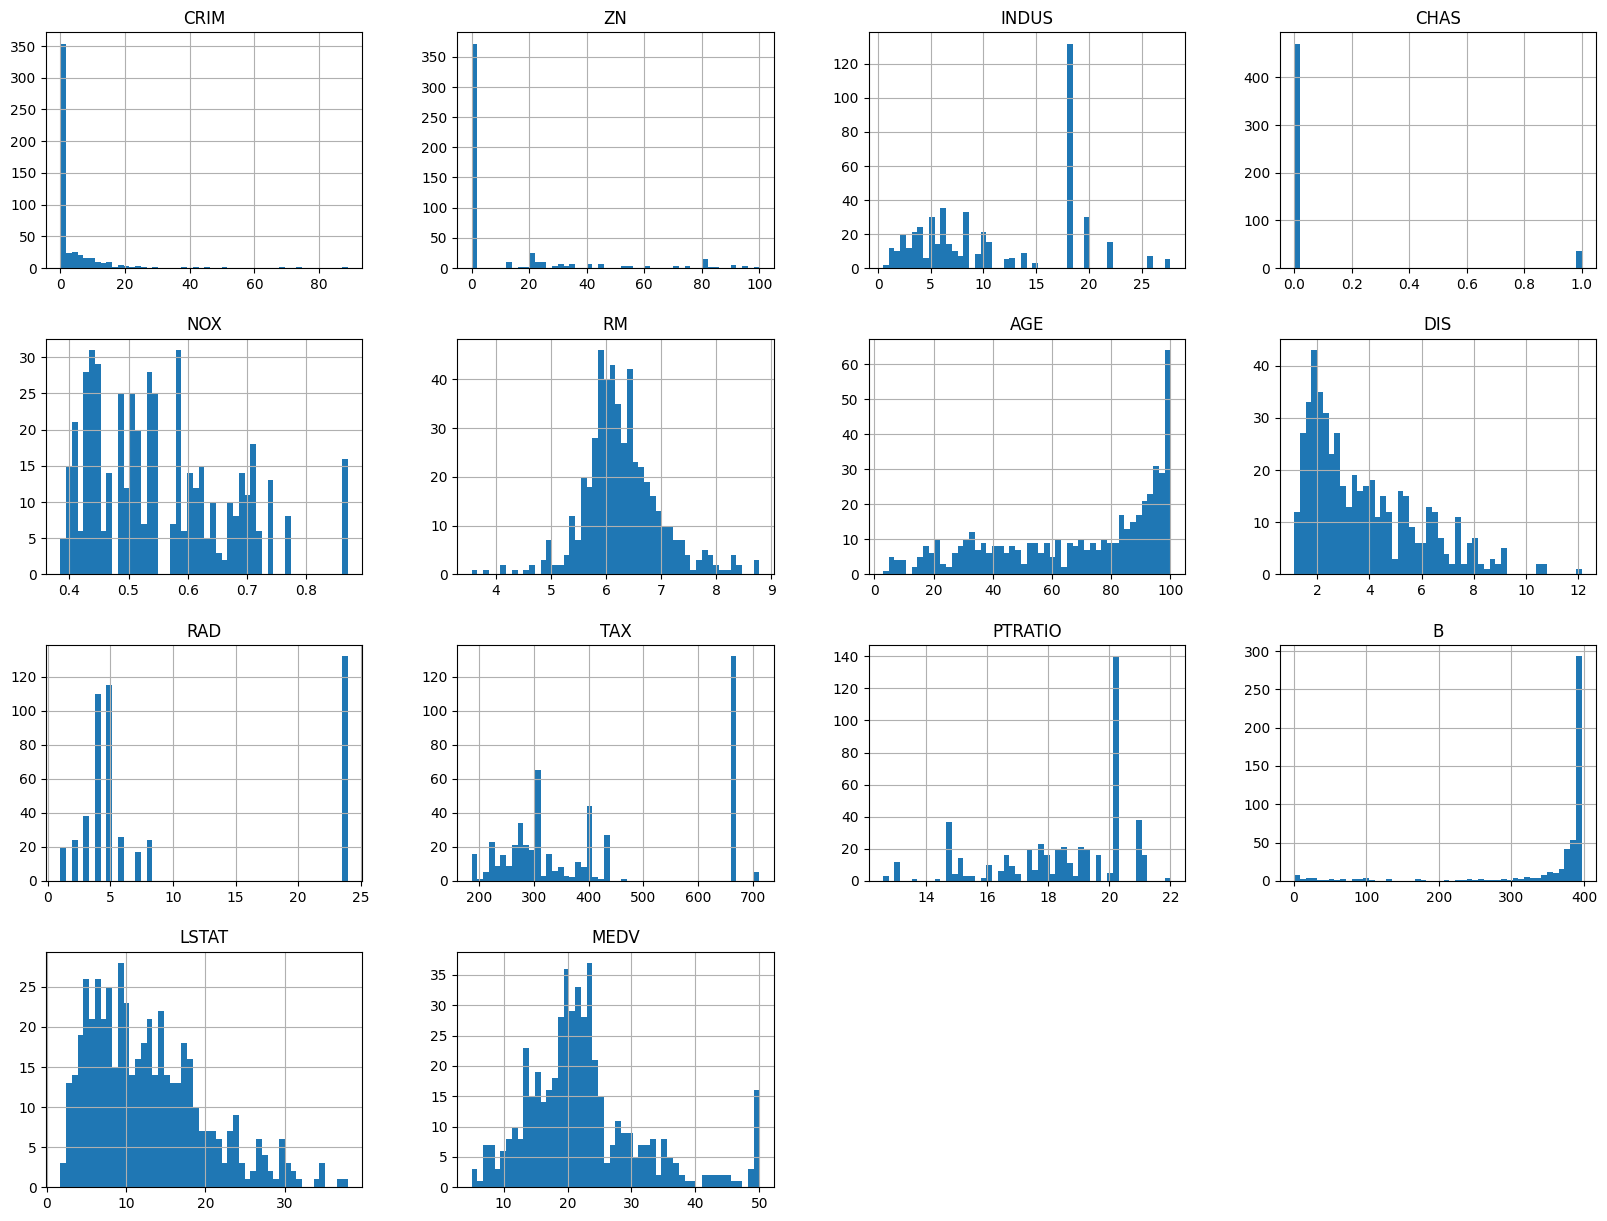

In [8]:
import matplotlib.pyplot as plt 
housing.hist( bins = 50,  figsize = (20,15))
plt.show()

## Train-Test Splitting

In [9]:
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(housing, test_size=0.2 , random_state=42)
print(f"row in train set : {len(train_set)} \nrow in test set : {len(test_set)}")

row in train set : 404 
row in test set : 102


In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1 , test_size=0.2 , random_state=42)
for train_index , test_index in split.split(housing , housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [11]:
strat_test_set['CHAS'].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [12]:
strat_train_set['CHAS'].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [13]:
housing = strat_train_set.copy()

## Looking for correlation

In [14]:
cor_matrix = housing.corr()
cor_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

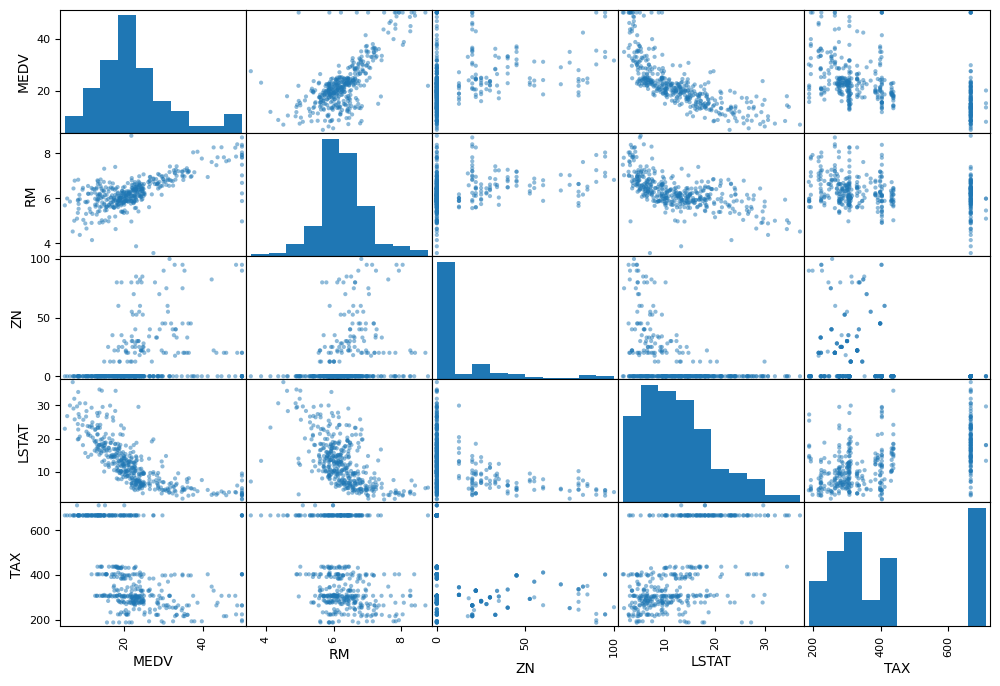

In [15]:
from pandas.plotting import scatter_matrix
attribute = ['MEDV' , 'RM' , 'ZN' , 'LSTAT', 'TAX']
scatter_matrix(housing[attribute] ,figsize=(12,8))
plt.show()

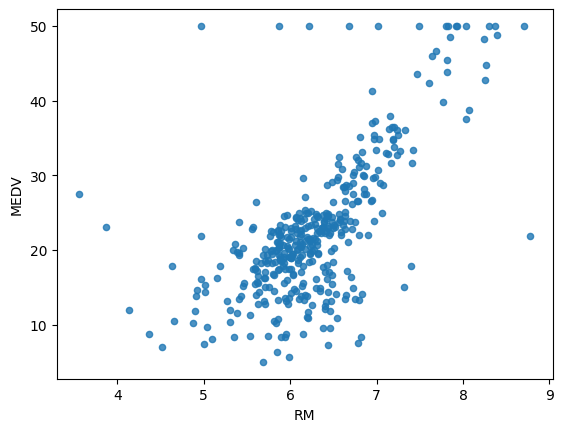

In [16]:
housing.plot(kind = 'scatter' , x='RM' , y='MEDV', alpha=0.8)
plt.show()

## Trying out Attribute combination

In [17]:
housing['TAXRM'] = housing['TAX'] / housing['RM']

In [18]:
cor_matrix = housing.corr()
cor_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.528626
LSTAT     -0.740494
Name: MEDV, dtype: float64

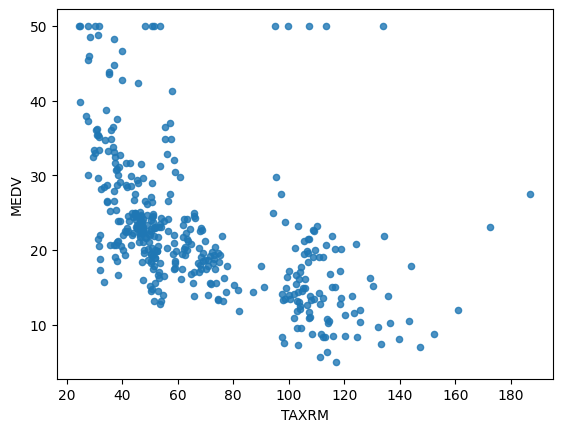

In [19]:
housing.plot(kind = 'scatter' , x='TAXRM' , y='MEDV', alpha=0.8)
plt.show()

In [20]:
housing = strat_train_set.drop('MEDV' , axis = 1)
housing_labels = strat_train_set['MEDV'].copy()

## Missing Attributes

In [21]:
from sklearn.impute import SimpleImputer 

In [22]:
imputer = SimpleImputer(strategy= 'median')
imputer.fit(housing)
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [23]:
X = imputer.transform(housing)
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [24]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278609,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712366,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## creating a pipeline

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipline = Pipeline([
    ('imputer' , SimpleImputer(strategy = 'median')),
    #.... add more if you want
    ('std_scaler' , StandardScaler()),
])

In [26]:
housing_num = my_pipline.fit_transform(housing)

In [27]:
housing_num.shape

(404, 13)

## Selecting a desire model

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
    # MODEL 1
# model = DecisionTreeRegressor()

   # MODEL 2
# model = LinearRegression()

  # MODEL 3
model = RandomForestRegressor()

model.fit(housing_num, housing_labels)

RandomForestRegressor()

In [29]:
some_data = housing.iloc[:5]

In [30]:
some_labels = housing_labels.iloc[:5]

In [31]:
prepare_data = my_pipline.transform(some_data)

In [32]:
model.predict(prepare_data)

array([22.532, 25.39 , 16.645, 23.252, 23.454])

In [33]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [34]:
import numpy as np
from sklearn.metrics import mean_squared_error
housing_prediction = model.predict(housing_num)
mse = mean_squared_error(housing_labels, housing_prediction)
rmse = np.sqrt(mse)

In [35]:
print(f"Mean_Squar_Error : {mse}\nRoot_Mean_squar_Error : {rmse}")

Mean_Squar_Error : 1.4867779405940573
Root_Mean_squar_Error : 1.2193350403371739


## Using better evaluation technique - Cross Validation

In [36]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model , housing_num , housing_labels , scoring='neg_mean_squared_error', cv=10)
rmse_scores = np.sqrt(-scores)

In [37]:
def print_scores(scores):
    print('Scores: ', scores)
    print('Mean: ' , scores.mean())
    print('Standard division: ', scores.std())

In [38]:
print_scores(rmse_scores)

Scores:  [2.85265457 2.87992657 4.50748512 2.60823135 3.37735991 2.60996424
 4.66364302 3.37019143 3.27142222 3.43732102]
Mean:  3.3578199443231505
Standard division:  0.6816134620352093


## Saving the Model

In [39]:
import joblib
joblib.dump(model, 'Real_Estate.joblib')

['Real_Estate.joblib']

## Testing the model on test data 

In [40]:
x_test = strat_test_set.drop('MEDV' , axis = 1)
y_test = strat_test_set['MEDV'].copy()
x_test_prepared = my_pipline.transform(x_test)
final_predection = model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test , final_predection)
final_rsme = np.sqrt(final_mse)

In [41]:
print("FINAL PREDECTION: ", final_predection)
print("\nORINGNAL LABEL: ", list(y_test))

FINAL PREDECTION:  [25.633 11.454 25.751 22.091 18.183 14.929 20.181 14.658 31.629 40.767
 19.765 11.9   23.228 27.969 19.939 10.74  30.934 14.661 23.475 18.637
 19.799 17.962 17.308 21.962 18.671 31.436 15.711 33.225  8.643 33.744
 23.48  21.637 22.607 10.841 21.113 11.069 43.445 24.603 23.391 42.362
 24.442 29.067 20.332 20.96  18.886 33.361 45.1   20.448 20.058 21.672
 21.371 14.905 21.627 15.164 25.655 32.653 42.299 29.408 19.776 20.837
 46.477 10.075 18.934 25.83  14.61  33.332 20.004 18.083 19.68  33.853
 25.808 22.55  21.808 22.372 34.751 13.296 15.777 19.825 20.865 21.387
 22.393 21.291 14.262 23.153 21.008 21.358 13.719 21.206 21.662 23.583
 19.077 27.278  7.376 26.311 19.039 29.269 19.431 30.769 13.785 26.578
 21.339 20.387]

ORINGNAL LABEL:  [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.

In [42]:
print(f'Finla Mean Root Sq Error: {final_rsme}')

Finla Mean Root Sq Error: 2.919262435387861


## Using the model 

In [43]:
prepare_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23979304, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

In [44]:
from joblib import load
model = load('Real_Estate.joblib')
feature = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23979304, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.14164221, -1.96091034]])
model.predict(feature)

array([25.294])